In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from tqdm import tqdm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import all data
gfp_only = pd.read_csv('plate_data/gfp_only.csv')
same_corr = pd.read_csv('plate_data/same_correlation.csv')
normalization = pd.read_csv('plate_data/normalization.csv')
trans_elements = pd.read_csv('plate_data/transelements.tsv')

In [3]:
low_color = sns.color_palette('Set2').as_hex()[0]
med_color = sns.color_palette('Set2').as_hex()[1]
hi_color = sns.color_palette('Set2').as_hex()[2]
control_color='gray'

In [4]:
# Color palette and order settings for Fig1B
sns.set_palette('Set2')

my_pal = {"pCL1":sns.color_palette()[0],
           "pCL2":sns.color_palette()[0],
           "pCL3":sns.color_palette()[0],
           "pCL4":sns.color_palette()[0], 
           "pCL5":sns.color_palette()[0], 
           "pCM1":sns.color_palette()[1],
           "pCM2":sns.color_palette()[1], 
           "pCM3":sns.color_palette()[1], 
           "pCM4":sns.color_palette()[1], 
           "pCM5":sns.color_palette()[1], 
           "pCH1":sns.color_palette()[2],
           "pCH2":sns.color_palette()[2],
           "pCH3":sns.color_palette()[2], 
           "pCH4":sns.color_palette()[2], 
           "pCH5":sns.color_palette()[2],
           "no prom.":"gray",
           "pNOS":"gray",
           "35s":"gray",
           "empty":sns.color_palette()[1],
           "reporter":sns.color_palette()[1]}
order = gfp_only.groupby('pCONS_label')['log_GFP'].mean().sort_values().index.to_list()

In [5]:
## Figure 1B alternative visual

# sns.set_context('paper')
# sns.set(font_scale=1.4)
# sns.set_style('ticks')
# fig, ax = plt.subplots(figsize=(5, 10)) 

# sns.violinplot(data=gfp_only, 
#                y="pCONS_label", x="log_GFP", 
#                ax=ax, 
#                width=0.8, linewidth=1.5, order=reversed(order[1:]), 
#                scale="count", palette=my_pal)
# ax.set_xlabel(r'$\rm{log}_{10}$(GFP) [AU]')
# ax.set_ylabel("")
# sns.despine(fig=fig, ax=ax, left=True, trim=True)
#plt.savefig(fname="f1_vertical.pdf", bbox_inches="tight")

/home/archblade/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


/home/archblade/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


/home/archblade/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/archblade/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, -0.02, '$\\rm{log}_{10}$(GFP) [AU]')

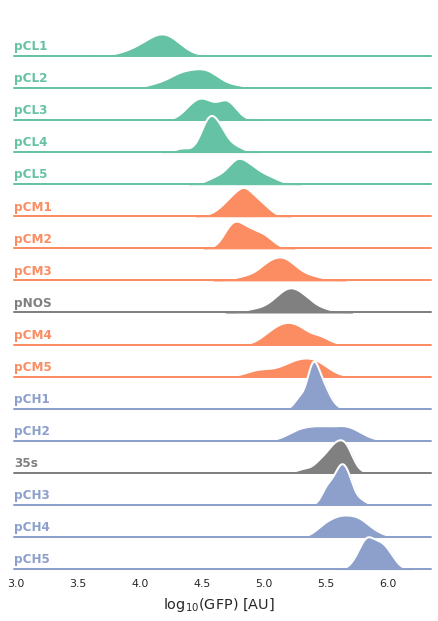

In [6]:
sns.set_context('paper')
#sns.set(font_scale=1.4)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(gfp_only, row="pCONS_label", hue="pCONS_label", 
                  aspect=13, height=.5, row_order=order[2:], palette=my_pal)

g.map(sns.kdeplot, 'log_GFP', fill=True, alpha=1, linewidth=1, bw_adjust=1, clip_on=False)
g.map(sns.kdeplot, 'log_GFP', color='white', bw_adjust=1, lw=2, clip_on=False)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "pCONS_label")

g.fig.subplots_adjust(hspace=-0.35)
g.set_titles("")
g.fig.supxlabel(r'$\rm{log}_{10}$(GFP) [AU]', y=-0.02)
g.set(yticks=[], ylabel="", xlabel="")
g.despine(bottom=True, left=True)
g.savefig('figs/fig1B.pdf')

Text(0.5, 0.01, 'GFP [AU]')

Text(0.02, 0.5, 'mScarlet [AU]')

Text(0.75, 0.1, '$\\rho =$0.92\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.85\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.89\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$1.00\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.96\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.89\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.88\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.94\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.95\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.94\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.96\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.95\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.97\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.98\n$P =$0.00')

Text(0.75, 0.1, '$\\rho =$0.97\n$P =$0.00')

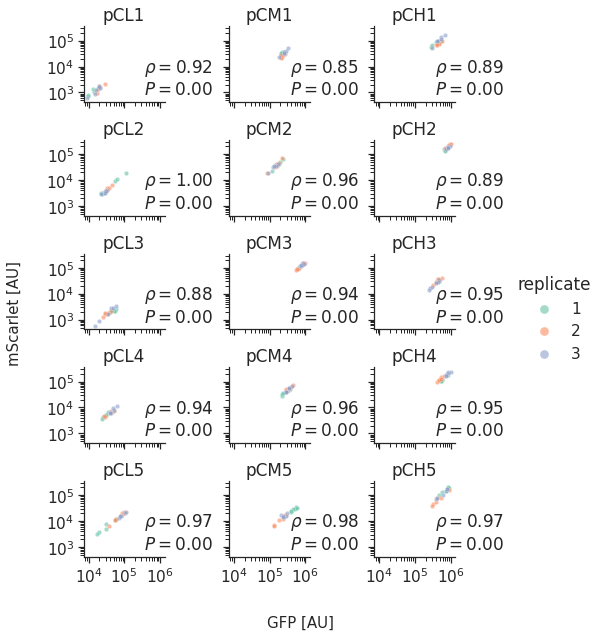

In [7]:
vertical_order = ['pCL1',
 'pCM1',
 'pCH1',
 'pCL2',
 'pCM2',
 'pCH2',
 'pCL3',
 'pCM3',
 'pCH3',
 'pCL4',
 'pCM4',
 'pCH4',
 'pCL5',
 'pCM5',
 'pCH5']

d_pearson = same_corr.groupby('pCONS_label').apply(lambda x: stats.pearsonr(x.GFP,x.mScarlet)).to_dict()
k_pearson = list(d_pearson.keys())

#exclude = []
sns.set_context('paper')
sns.set(font_scale=1.4)
sns.set_style('ticks')
g = sns.FacetGrid(same_corr, 
                  col="pCONS_label", 
                  sharex=True, sharey=True, 
                  col_wrap=3, hue="replicate", 
                  height=1.8, aspect=1.35, 
                  col_order=vertical_order, palette=sns.color_palette('Set2'))
g.map(sns.scatterplot, "GFP", "mScarlet", s=20, alpha=0.6)
g.set_titles(col_template="{col_name}")
g.fig.supxlabel('GFP [AU]', fontsize=15)
g.fig.supylabel('mScarlet [AU]', fontsize=15)
g.set_xlabels('')
g.set_ylabels('')
g.set(xscale="log", yscale="log")
g.add_legend(title="replicate", markerscale=2)
for idx, ax in enumerate(g.axes.ravel()):
    ax.annotate(r'$\rho =$' f'{d_pearson[vertical_order[idx]][0]:.2f}'+'\n'+ r'$P =$' f'{d_pearson[vertical_order[idx]][1]:.2f}', 
                xy=(0.75, 0.1), xycoords='axes fraction')
g.tight_layout()
plt.subplots_adjust(hspace=.5, wspace=.8)
g.savefig(fname="figs/fig3B.pdf", bbox_inches="tight")

In [8]:
exclude_ensemb = ["35s", "pNOS"]
fig_ensemb_df = same_corr.query(
    'pCONS_label not in @exclude_ensemb').reset_index(drop=True)

fig_ensemb_df["ensemb_label"] = fig_ensemb_df.pCONS_label.apply(
    lambda x: "pCL1-5" if "L" in x else "pCM1-5" if "M" in x else "pCH1-5" if "H" in x else x)

Text(0.5, 34.49999999999994, 'GFP [AU]')

Text(25.125, 0.5, 'mScarlet [AU]')

Text(0.7, 0.2, '$\\rho =$0.867\n$P =$0.000')

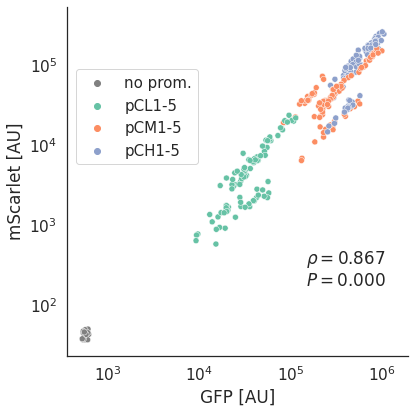

In [9]:
ensemb_pearson = stats.pearsonr(same_corr.query('pCONS_label != "leaf"').GFP,
same_corr.query('pCONS_label != "leaf"').mScarlet)

sns.set_context('paper')
sns.set(font_scale=1.4)
sns.set_style('white')
sns.set_palette('Set2')
g = sns.jointplot(data=fig_ensemb_df,
                  x='GFP',
                  y='mScarlet',
                  hue='ensemb_label', ax=ax, height=7, 
                  hue_order = ["no prom.", "pCL1-5", "pCM1-5", "pCH1-5"], 
                  palette=[control_color, low_color, med_color, hi_color])
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')
g.ax_joint.set_xlabel('GFP [AU]')
g.ax_joint.set_ylabel('mScarlet [AU]')
g.ax_marg_x.remove()
g.ax_marg_y.remove()
plt.legend(bbox_to_anchor=(0.385, 0.82), loc=1, borderaxespad=0, prop=dict(size=15))
g.ax_joint.annotate(r'$\rho =$' f'{ensemb_pearson[0]:.3f}'+'\n'+ r'$P =$' f'{ensemb_pearson[1]:.3f}', 
                xy=(0.7, 0.2), xycoords='axes fraction')
g.savefig(fname="figs/fig3C.pdf", bbox_inches="tight")

Text(0.5, 13.499999999999957, '$\\rm{log}_{10}$(GFP) [AU]')

Text(2.25, 0.5, '$\\rm{log}_{10}$(mScarlet) [AU]')

Text(0.7, 0.2, '$\\rho =$0.981\n$P =$0.000')

Text(0.5, 1.0, 'PCM5 two reporters')

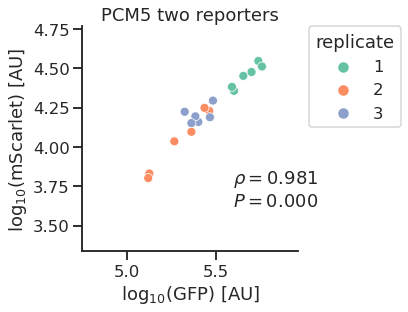

In [10]:
pcm5_pearson = stats.pearsonr(same_corr.query('pCONS_label == "pCM5"').GFP,
same_corr.query('pCONS_label == "pCM5"').mScarlet)

sns.set_context('talk')
sns.set_style('ticks')
g = sns.jointplot(data=same_corr.query('pCONS_label == "pCM5"'),
                  x='log_GFP',
                  y='log_mScarlet',
                  hue='replicate', ax=ax, height=5, 
                  palette=sns.color_palette('Set2').as_hex()[0:3])
g.ax_marg_x.remove()
g.ax_marg_y.remove()

g.ax_joint.set_xlabel(r'$\rm{log}_{10}$(GFP) [AU]')
g.ax_joint.set_ylabel(r'$\rm{log}_{10}$(mScarlet) [AU]')

plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2, 
           borderaxespad=0., 
           title="replicate")
g.ax_joint.annotate(r'$\rho =$' f'{pcm5_pearson[0]:.3f}'+'\n'+ r'$P =$' f'{pcm5_pearson[1]:.3f}', 
                xy=(0.7, 0.2), xycoords='axes fraction')
sns.despine(top=True)
plt.title('PCM5 two reporters')

g.savefig(fname="figs/fig3A.pdf", bbox_inches="tight")

<AxesSubplot:xlabel='pCONS_label', ylabel='log_GFP'>

Text(0.5, 0, '')

Text(0, 0.5, '$\\rm{log}_{10}$(GFP) [AU]')

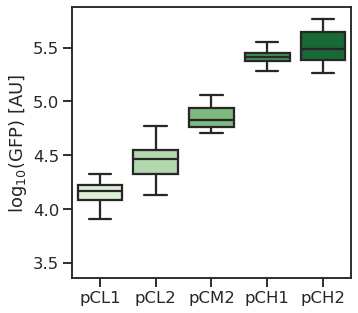

In [11]:
fig, ax = plt.subplots(figsize=(5, 5)) 
sns.set_style('whitegrid')
include = ["pCL1", "pCL2", "pCM2", "pCH1", "pCH2"]
sns.boxplot(data = gfp_only.query('pCONS_label in @include'), 
            x='pCONS_label', y='log_GFP', 
            order=include, fliersize=0, palette='Greens')
ax.set_xlabel('')
ax.set_ylabel(r'$\rm{log}_{10}$(GFP) [AU]')
plt.savefig('figs/fig2A.pdf', bbox_inches="tight")

In [12]:
# Bootstrapping functions to calculate confidence interval of coefficent of variation before and after signal normalization
def calc_Expectation(a):
    prb = 1 / len(a)
    sum = 0
    for i in a:
        sum += (i * prb)
    # returning expectation as sum
    return float(sum)

def single_GFP_boot(prom, exp):
    prom_embed = '"'+prom+'"'
    exp_embed = '"'+exp+'"'
    query = 'pCONS_label==' + prom_embed + ' and exp==' + exp_embed
    return normalization.query(query).sample(n=18, replace=True).GFP.values

def single_norm_GFP_boot(prom, exp):
    prom_embed = '"'+prom+'"'
    exp_embed = '"'+exp+'"'
    query = 'pCONS_label==' + prom_embed + ' and exp==' + exp_embed
    sample = normalization.query(query).sample(n=18, replace=True)[["GFP", "mScarlet"]]
    return (sample.GFP/sample.mScarlet).values

def pairwise_boot_CV(prom1, exp1, n=1000):
    boot_stat = []
    for i in range(n):
        no_norm = single_GFP_boot(prom1, exp1)
        no_norm_std = no_norm.std(ddof=1)
        no_norm_mean = no_norm.mean()
        no_norm_cv = no_norm_std / no_norm_mean
        norm = single_norm_GFP_boot(prom1, exp1)
        norm_std = norm.std(ddof=1)
        norm_mean = norm.mean()
        norm_cv = norm_std / norm_mean
        boot_stat.append(norm_cv/no_norm_cv)
    expect = calc_Expectation(boot_stat)
    boot_std = np.std(boot_stat, ddof=1)
    return (expect, boot_std)

In [13]:
# 10k was used for manuscript

order = [prom for prom in order[2:] if "pC" in prom]
hi_compare = []
for prom in tqdm(order):
    hi_compare.append(pairwise_boot_CV(prom, 'hi', n=1000))

low_compare = []
for prom in tqdm(order):
    low_compare.append(pairwise_boot_CV(prom, 'low', n=1000))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.51s/it]


In [14]:
hi_dict = {}
for prom, val in zip(order, hi_compare):
    hi_dict[prom] = val[0]

low_dict = {}
for prom, val in zip(order, low_compare):
    low_dict[prom] = val[0]

    
hi_std_dict = {}
for prom, val in zip(order, hi_compare):
    hi_std_dict[prom] = val[1]

low_std_dict = {}
for prom, val in zip(order, low_compare):
    low_std_dict[prom] = val[1]
    
cv_heat = pd.concat([pd.Series(low_dict), pd.Series(hi_dict)], axis=1)
cv_heat.columns = ['low', 'hi']

In [15]:
low_labs = []
for prom in order:
    lab =f'{low_dict[prom]:.2f}' + r'$\pm$' + f'{low_std_dict[prom]:.2f}'
    low_labs.append(lab)
    
hi_labs = []
for prom in order:
    lab =f'{hi_dict[prom]:.2f}' + r'$\pm$' + f'{hi_std_dict[prom]:.2f}'
    hi_labs.append(lab)

<AxesSubplot:>

Text(0.5, 34.5, 'Normalizer')

[Text(0.5, 0, 'low\n(pCL2)'), Text(1.5, 0, 'high\n(pCH5)')]

Text(16.5, 0.5, 'pCONS promoter')

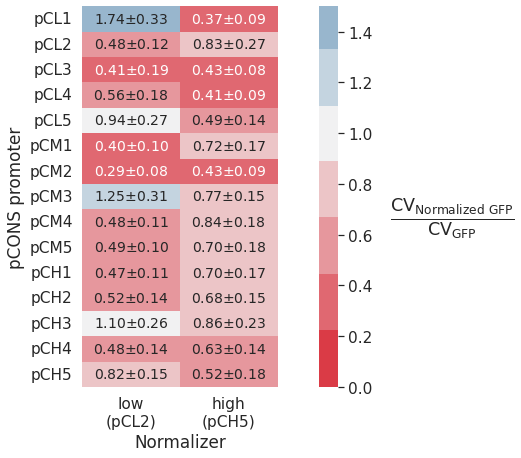

In [16]:
cmap = sns.diverging_palette(10, 240, n=9)
sns.set_context('paper')
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(5, 7))
sns.heatmap(cv_heat, ax=ax, center=1, cmap=cmap, 
            annot=np.array([low_labs, hi_labs]).T, 
            annot_kws={'size':14}, 
            fmt='', 
            vmax=1.5, vmin=0, cbar_kws=dict(location='right', use_gridspec=False, pad=0.15))
colorbar = ax.collections[0].colorbar
colorbar.set_label(r'$\frac{\rm{CV}_{\rm{Normalized\ GFP}}}{\rm{CV}_{\rm{GFP}}}$', size=25, rotation=0, labelpad=80)
ax.set_xlabel('Normalizer')
ax.set_xticklabels(["low\n(pCL2)", "high\n(pCH5)"])
ax.set_ylabel('pCONS promoter')
plt.savefig('figs/fig4C.pdf', bbox_inches="tight")

KruskalResult(statistic=7.405135667820621, pvalue=0.006503793880131645)

KruskalResult(statistic=384.42196325545945, pvalue=1.3559535229633594e-85)

Text(0.718, 0.9, '**')

[Text(0, 0, 'low\n(pCL2)'), Text(1, 0, 'high\n(pCH5)')]

Text(0.69, 0.94, '***')

[Text(0, 0, 'low\n(pCL2)'), Text(1, 0, 'high\n(pCH5)')]

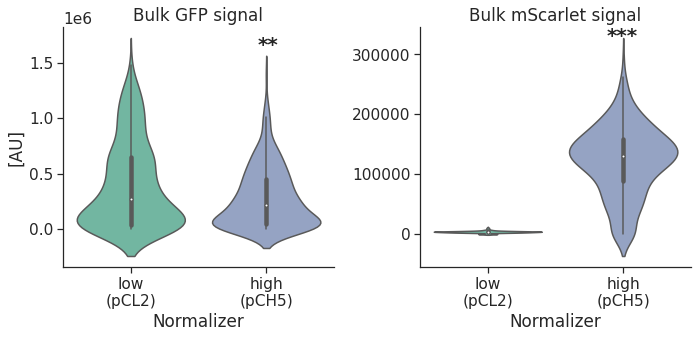

In [17]:
stats.kruskal(normalization.query('exp == "hi"').GFP, normalization.query('exp == "low"').GFP)
stats.kruskal(normalization.query('exp == "hi"').mScarlet, normalization.query('exp == "low"').mScarlet)

vis = normalization.melt(id_vars=['pCONS_label', 'replicate','exp'], 
                         value_vars=['GFP', 'mScarlet'], 
                         var_name='FP',
                         value_name='fluor' )

sns.set_context('paper')
sns.set(font_scale=1.4)
sns.set_style('ticks')

g = sns.FacetGrid(data=vis, 
                  col="FP", hue='FP',
                  sharex=True, sharey=False, 
                  height=5, aspect=1)
g.map(sns.violinplot, "exp", "fluor", s=35, alpha=0.2, order=['low', 'hi'], scale='count', 
      palette=[low_color, hi_color])
g.set_titles(col_template="Bulk {col_name} signal")
g.set_ylabels('[AU]')
g.set_xlabels('Normalizer')
for idx, ax in enumerate(g.axes.ravel()):
    if idx == 0:
        ax.annotate('**', xy=(0.718, 0.9), fontsize=20, 
                    xycoords='axes fraction', weight='bold')
        ax.set_xticklabels(["low\n(pCL2)", "high\n(pCH5)"])
    else:
        ax.annotate('***', xy=(0.69, 0.94), fontsize=20, 
                    xycoords='axes fraction', weight='bold')
        ax.set_xticklabels(["low\n(pCL2)", "high\n(pCH5)"])

g.tight_layout()
# plt.subplots_adjust(hspace=.5, wspace=1.2)
g.savefig(fname="figs/fig4D.pdf", bbox_inches="tight")


Text(0.5, 16.499999999999957, 'mScarlet [AU $\\times 10^{5}$]')

Text(7.125, 0.5, 'GFP [AU]')

Text(0.2, 0.75, 'pCH1-GFP')

Text(0.2, 0.35, 'pCL1-GFP')

/tmp/ipykernel_515295/753851754.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax_joint.set_xticklabels([r'$0$',


[Text(0.0, 0, '$0$'),
 Text(100000.0, 0, '$1$'),
 Text(200000.0, 0, '$2$'),
 Text(300000.0, 0, '')]

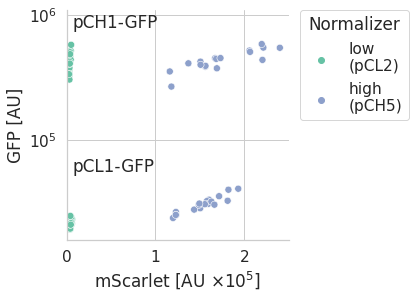

In [18]:
include = ["pCH1", "pCL1"]

sns.set_context('paper')
sns.set(font_scale=1.4)
sns.set_style('whitegrid')
sns.set_palette('Set2')
g = sns.jointplot(data=normalization.query("pCONS_label in @include"),
                  x='mScarlet',
                  y='GFP',
                  hue='exp', 
                  ax=ax, 
                  height=5,
                  hue_order=['low', 'hi'], 
                  xlim=(0,250000), joint_kws={'s': 50}, 
                  palette=[low_color, hi_color])
g.ax_joint.set_yscale('log')
g.ax_joint.set_xlabel(r'mScarlet [AU $\times 10^{5}$]')
g.ax_joint.set_ylabel('GFP [AU]')
g.ax_marg_x.remove()
g.ax_marg_y.remove()
g.ax_joint.annotate('pCH1-GFP', (.2, .75), xycoords='figure fraction')
g.ax_joint.annotate('pCL1-GFP', (.2, .35), xycoords='figure fraction')

handles, labels = g.ax_joint.get_legend_handles_labels()
g.ax_joint.legend(handles=handles, labels=['low\n(pCL2)', 'high\n(pCH5)'],
                  title="Normalizer", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

labs = g.ax_joint.get_xticklabels()

g.ax_joint.set_xticklabels([r'$0$', 
                            r'$1$', 
                            r'$2$'])
g.savefig(fname="figs/fig4A_corrs.pdf", bbox_inches="tight")

In [19]:
horizontal_order = ['pCL1',
 'pCL2',
 'pCL3',
 'pCL4',
 'pCL5',
 'pCM1',
 'pCM2',
 'pCM3',
 'pCM4',
 'pCM5',
 'pCH1',
 'pCH2',
 'pCH3',
 'pCH4',
 'pCH5']

Text(0.5, 0.05, 'GFP [AU]')

Text(0.05, 0.5, 'mScarlet [AU]')

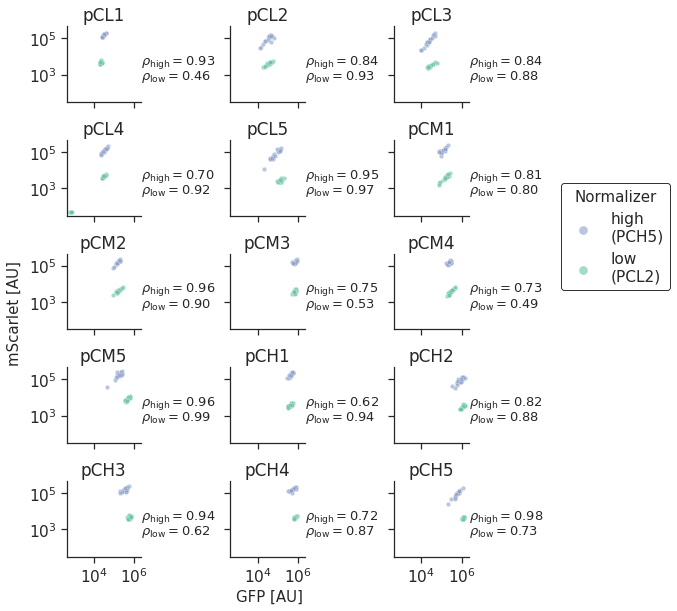

In [20]:
d_pearson = normalization.groupby(['pCONS_label', 'exp']).apply(
    lambda x: stats.pearsonr(x.GFP,x.mScarlet)).to_dict()
labels=['low\n(PCL2)', 'high\n(PCH5)']

sns.set_context('paper')
sns.set(font_scale=1.4)
sns.set_style('ticks')
sns.set_palette('Set2')
g = sns.FacetGrid(normalization, 
                  col="pCONS_label", 
                  sharex=True, sharey=True, 
                  col_wrap=3, hue="exp", height=1.8, aspect=1.5, col_order=horizontal_order, 
                  palette=[hi_color, low_color])
g.map(sns.scatterplot, "GFP", "mScarlet", s=20, alpha=0.6)
g.set_titles(col_template="{col_name}")
g.set_xlabels('')
g.set_ylabels('')
g.fig.supxlabel('GFP [AU]', y=0.05, fontsize=15)
g.fig.supylabel('mScarlet [AU]', x=.05, fontsize=15)

g.set(xscale="log", yscale="log")
handles = g._legend_data.values()

g.fig.legend(handles=handles, labels=labels[::-1], 
             bbox_to_anchor=(1,0.7), loc=2, 
             borderaxespad=0, title='Normalizer', frameon=True, markerscale=2, title_fontsize=15, edgecolor='black')

for idx, ax in enumerate(g.axes.ravel()):
    _ = ax.annotate(r'$\rho_{\rm{high}} =$' f"{d_pearson[(vertical_order[idx], 'hi')][0]:.2f}", 
                xy=(1, 0.5), xycoords='axes fraction', fontsize=13)
    _ = ax.annotate(r'$\rho_{\rm{low}} =$' f"{d_pearson[(vertical_order[idx], 'low')][0]:.2f}", 
                xy=(1, 0.3), xycoords='axes fraction', fontsize=13)
g.tight_layout()
plt.subplots_adjust(hspace=.5, wspace=1.2)
g.savefig(fname="figs/fig4B_corrs.pdf", bbox_inches="tight")

In [21]:
curated_order = ['pCH1-Gal4:VP16+none', 
                 'none+Reporter', 
                 'pCL1-Gal4:VP16+Reporter',
                 'pCL3-Gal4:VP16+Reporter',
                 'pCM2-Gal4:VP16+Reporter', 
                 'pCH1-Gal4:VP16+Reporter', 
                 'pCH4-Gal4:VP16+Reporter', 
                 'pCH5-Gal4:VP16+Reporter']

curated_palette = {'pCH1-Gal4:VP16+none':'gray', 
                 'none+Reporter':'gray', 
                 'pCL1-Gal4:VP16+Reporter':sns.color_palette('Set2')[0],
                 'pCL3-Gal4:VP16+Reporter':sns.color_palette('Set2')[0],
                 'pCM2-Gal4:VP16+Reporter':sns.color_palette('Set2')[1], 
                 'pCH1-Gal4:VP16+Reporter':sns.color_palette('Set2')[2], 
                 'pCH4-Gal4:VP16+Reporter':sns.color_palette('Set2')[2], 
                 'pCH5-Gal4:VP16+Reporter':sns.color_palette('Set2')[2]}

Text(0.5, 0.01, '$\\rm{log}_{10}$(GFP) [AU]')

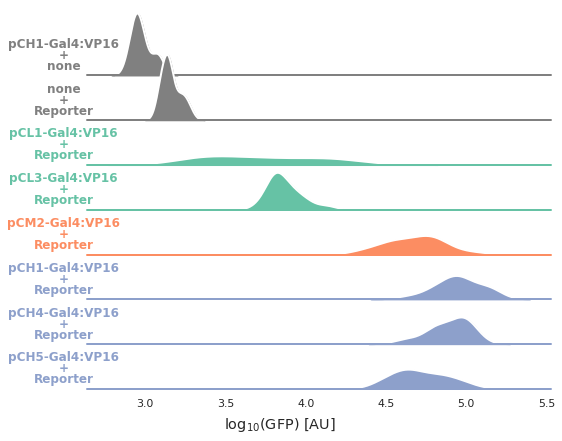

In [22]:
sns.set_context('paper')
#sns.set(font_scale=1.4)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(trans_elements, row="condition", hue="condition", 
                  aspect=10, height=.8, row_order=curated_order, palette=curated_palette)

g.map(sns.kdeplot, 'log_GFP', fill=True, alpha=1, linewidth=1, bw_adjust=1, clip_on=False)
g.map(sns.kdeplot, 'log_GFP', color='white', bw_adjust=1, lw=2, clip_on=False)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    label = ('\n+\n').join(label.split('+'))
    ax.text(-0.05, .3, label, fontweight="bold", color=color,
            ha="center", va="center", transform=ax.transAxes, linespacing=0.8)

g.map(label, "condition")

g.fig.subplots_adjust(hspace=-0.35)
g.set_titles("")
g.fig.supxlabel(r'$\rm{log}_{10}$(GFP) [AU]')
g.set(yticks=[], ylabel="", xlabel="")
g.despine(bottom=True, left=True)
g.savefig('figs/fig2C_alt.pdf')

<AxesSubplot:xlabel='condition', ylabel='log_GFP'>

Text(0, 0.5, 'log$_{10}$(GFP)')

Text(0.5, 0, '')

[Text(0, 0, 'none\n+\nReporter'),
 Text(1, 0, 'pCL1-Gal4:VP16\n+\nReporter'),
 Text(2, 0, 'pCL3-Gal4:VP16\n+\nReporter'),
 Text(3, 0, 'pCM2-Gal4:VP16\n+\nReporter'),
 Text(4, 0, 'pCH1-Gal4:VP16\n+\nReporter'),
 Text(5, 0, 'pCH4-Gal4:VP16\n+\nReporter'),
 Text(6, 0, 'pCH5-Gal4:VP16\n+\nReporter')]

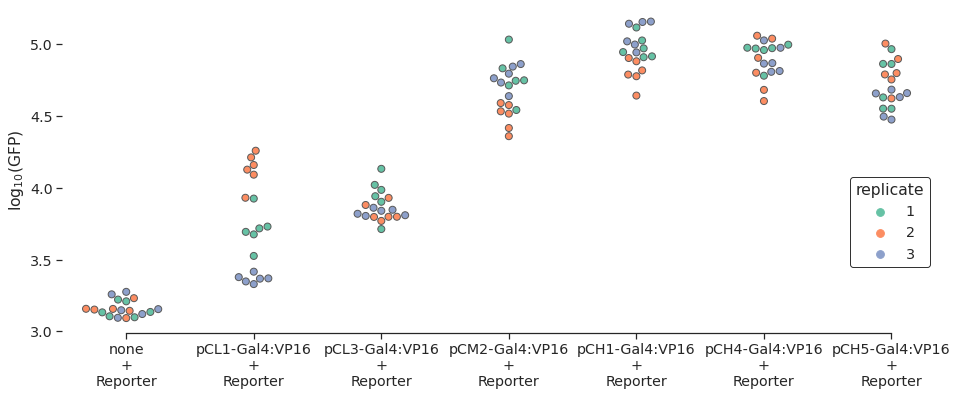

In [23]:
sns.set(font_scale=1.3)
sns.set_style('ticks')
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(16, 6)) 

sns.swarmplot(data=trans_elements, x="condition", y="log_GFP", 
              ax=ax,
              linewidth=1,
              order=curated_order[1:],
              size=7,
              hue='replicate')
ax.set_ylabel("log$_{10}$(GFP)")
ax.set_xlabel("")
old_ticks = [lab.get_text() for lab in ax.get_xticklabels()]
new_ticks = [('\n+\n').join(x.split('+')) for x in old_ticks]
ax.set_xticklabels(new_ticks)
sns.despine(fig=fig, ax=ax, left=True, trim=True)
plt.legend(title="replicate", bbox_to_anchor=(0.98, 0.5), frameon=True, edgecolor='black')
plt.savefig(fname="figs/fig2C.pdf", bbox_inches="tight")

In [24]:
trans_elements['pCONS_label'] = trans_elements.condition.apply(lambda x: x.split('+')[0].split('-')[0])
trans_elements['second_plasmid'] = trans_elements.condition.apply(lambda x: x.split('+')[1])

In [25]:
TE_compare = trans_elements.query('second_plasmid == "Reporter"').reset_index(drop=True)
TE_compare['pCONS_label'] = TE_compare.pCONS_label.replace('none', 'no prom.')
proms = list(TE_compare.pCONS_label.unique())
gfp_compare = gfp_only.query('pCONS_label in @proms').reset_index(drop=True)

In [26]:
gal_sem = TE_compare.groupby('pCONS_label').sem()['log_GFP']
gal_mean = TE_compare.groupby('pCONS_label').mean()['log_GFP']
gfp_sem = gfp_compare.groupby('pCONS_label').sem()['log_GFP']
gfp_mean = gfp_compare.groupby('pCONS_label').mean()['log_GFP']

In [27]:
df_compare = pd.DataFrame(dict(G4_mean=gal_mean, G4_sem = gal_sem, g_mean = gfp_mean, g_sem = gfp_sem))
df_compare = df_compare.sort_values(by='g_mean')
labels = ['no prom.', 'pCL1', 'pCL3', 'pCM2', 'pCH1', 'pCH4', 'pCH5']

<ErrorbarContainer object of 3 artists>

Text(2.736758699838137, 3.261049778772677, 'no prom.')

Text(3.9638274734077856, 3.8365094106248003, 'pCL1')

Text(4.423109163513816, 3.969608212552569, 'pCL3')

Text(4.699350451515789, 4.7797988709138775, 'pCM2')

Text(5.063031355377062, 4.920190970180704, 'pCH1')

Text(5.547437437757872, 4.744209038654656, 'pCH4')

Text(5.739617808569745, 4.816024286026177, 'pCH5')

Text(0.5, 0, 'PCONS activation [log$_{10}$(GFP)]')

Text(0, 0.5, 'Gal4 activation [log$_{10}$(GFP)]')

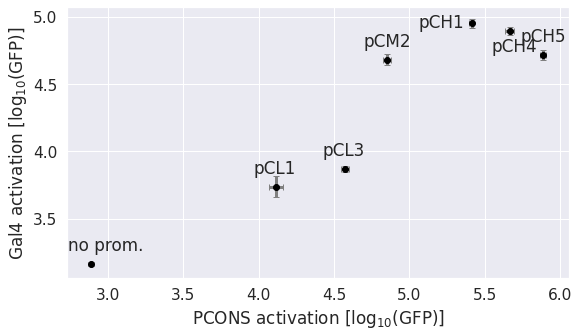

In [28]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(9, 5)) 
plt.errorbar(df_compare.g_mean, df_compare.G4_mean, xerr=df_compare.g_sem, yerr=df_compare.G4_sem, fmt='o', color='black',
             ecolor='gray', elinewidth=3, capsize=3);
for i, txt in enumerate(labels):
    if txt == 'pCH4':
        ax.annotate(txt, (df_compare.g_mean[i]-.12, df_compare.G4_mean[i]-.15))
    elif txt == 'pCH1':
        ax.annotate(txt, (df_compare.g_mean[i]-.35, df_compare.G4_mean[i]-.03))
    else:
        ax.annotate(txt, (df_compare.g_mean[i]-.15, df_compare.G4_mean[i]+.1))

ax.set_xlabel('PCONS activation [log$_{10}$(GFP)]')
ax.set_ylabel('Gal4 activation [log$_{10}$(GFP)]')
plt.savefig(fname="figs/fig2D.pdf", bbox_inches="tight")

In [29]:
## Add bootstrap RNA seq hexagon here

In [30]:
## Add Klepikova SI here